In [1]:
import numpy as np
import pandas as pd

import requests as req
from bs4 import BeautifulSoup as bs

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 영화랭킹 페이지에서 영화제목, 평점 수집

In [ ]:
url_main = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190716'

res = req.get(url_main)

#파서 종류 : lxml, html.parser, html5lib
soup = bs(res.text, 'html.parser') 

In [ ]:
#방법1
#순위, 영화제목, 평점 수집
name = soup.select('#old_content > table > tbody > tr > td.title > div > a')
rate = soup.select('#old_content > table > tbody > tr > td.point')

In [ ]:
#방법2
#순위, 영화제목, 평점 수집
rank_list = []
name_list = []
rating_list = []

for index in range(len(name)):
  rank = index + 1 
  rank_list.append(rank)
  name_list.append(name[index].string)
  rating_list.append(rate[index].string)

['그린 북',
 '원더',
 '알라딘',
 '어벤져스: 엔드게임',
 '교회오빠',
 '이웃집 토토로',
 '광해, 왕이 된 남자',
 '토이 스토리 4',
 '마녀 배달부 키키',
 '내부자들: 디 오리지널',
 '양들의 침묵',
 '번지 점프를 하다',
 '기쿠지로의 여름',
 '에이미',
 '세상을 바꾼 변호인',
 '천로역정: 천국을 찾아서',
 '연인',
 '부에나 비스타 소셜 클럽',
 '고양이를 부탁해',
 '건축학개론',
 '라라랜드',
 '엑소시스트',
 '극한직업',
 '기생충',
 '그녀',
 '옥자',
 '오멘',
 '스파이더맨: 파 프롬 홈',
 '레토',
 '탐정: 리턴즈',
 '안도 타다오',
 '콜드 워',
 '다가오는 것들',
 '바스터즈: 거친 녀석들',
 '리스본행 야간열차',
 '존 윅 3: 파라벨룸',
 '사일런스',
 '로켓맨',
 '나의 산티아고',
 '프란시스 하',
 '황혼에서 새벽까지',
 '악인전',
 '28일 후',
 '롱 리브 더 킹: 목포 영웅',
 '박화영',
 '진범',
 '노리개: 그녀의 눈물',
 '미드소마',
 '서스페리아',
 '애나벨 집으로']

In [ ]:
#순위, 영화제목, 평점을 DataFrame으로 표현
#방법2
#순위, 영화제목, 평점 수집
rank_list = []
name_list = []
rating_list = []

for index, n, r in zip(range(1, len(name)+1), name, rate):
    rank_list.append(index)
    name_list.append(n.text)
    rating_list.append(r.text)

In [ ]:
#순위, 영화제목, 평점을 DataFrame으로 표현
movie_info = {'순위':rank_list, '영화명':name_list, '평점':rating_list}
movie = pd.DataFrame(movie_info)
movie.set_index("순위", inplace=True)
movie.head()

,영화명,평점
순위,,
1,그린 북,9.61
2,원더,9.45
3,알라딘,9.45
4,어벤져스: 엔드게임,9.39
5,교회오빠,9.30


In [ ]:
#naver_movie_info.csv로 저장
movie.to_csv('naver_movie_info.csv',encoding = 'euc-kr')

In [ ]:
#naver_movie_info.csv로 읽어오기
nmi = pd.read_csv('naver_movie_info.csv',encoding = 'euc-kr')
nmi.head()

,순위,영화명,평점
0,1,그린 북,9.61
1,2,원더,9.45
2,3,알라딘,9.45
3,4,어벤져스: 엔드게임,9.39
4,5,교회오빠,9.30


# Pandas를 활용한 날짜 생성

In [42]:
"""시작 날짜, 끝나는 날짜"""
import pandas as pd

date = pd.date_range('2010-01-01', '2019-07-16',freq='d')
date

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14',
               '2019-07-15', '2019-07-16'],
              dtype='datetime64[ns]', length=3484, freq='D')

In [ ]:
"""URL에 맞게 날짜 형식변환 : strftime("%Y%m%d)"""
day_list = [] 
for day in date:
  day_list.append(day.strftime("%Y%m%d"))
day_list

# 날짜별 영화 평점 수집

In [ ]:
#얼만큼 진행되고있는지 알려주기
#!pip install tqdm
from tqdm import tqdm_notebook

In [45]:
movie_date = []
movie_name = []
movie_rate = []

#for day in day_list:
url_sub = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='

for day in day_list:
    #영화페이지 접근
    url_sub = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date="+day
    res = req.get(url_sub)
    soup = bs(res.text, 'html.parser')

    #제목, 평점 구하기
    name = soup.select('#old_content > table > tbody > tr > td.title > div > a')
    rate = soup.select('#old_content > table > tbody > tr > td.point')

    for n, r in zip(name,rate):
      movie_date.append(day)
      movie_name.append(n.text)
      movie_rate.append(r.text)


In [54]:
movie_dic = {'날짜':movie_date, 
             '영화명':movie_name, 
             '평점':movie_rate}

movie_df = pd.DataFrame(movie_dic)
movie_df.head()

,날짜,영화명,평점
0,20100101,더 코브: 슬픈 돌고래의 진실,9.29
1,20100101,아바타,9.25
2,20100101,똥파리,9.24
3,20100101,에반게리온: 파,9.23
4,20100101,바람,9.13


In [56]:
movie_df.to_csv('naver_movie_info.csv',encoding='utf-8')

In [2]:
movie_df2 = pd.read_csv('naver_movie_info.csv',
                        index_col = 0,
                        parse_dates = ['날짜'],
                        encoding = 'utf-8')


In [3]:
movie_df2.head()

,날짜,영화명,평점
0,2010-01-01,더 코브: 슬픈 돌고래의 진실,9.29
1,2010-01-01,아바타,9.25
2,2010-01-01,똥파리,9.24
3,2010-01-01,에반게리온: 파,9.23
4,2010-01-01,바람,9.13


# 영화 평점 변화 시각화하기 전 시각화연습

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 영화 평점 변화 시각화하기

## 평균 평점이 높은 영화만 보여주기

In [5]:
"""많은 영화 제목이 있으니 이중에서 평점 평균이 높은것만 추리기"""
movie_df2["영화명"].unique()

array(['더 코브: 슬픈 돌고래의 진실', '아바타', '똥파리', ..., '진범', '미드소마',
       '극장판 엉덩이 탐정: 화려한 사건 수첩'], dtype=object)

In [6]:
name_ranking = []
for name in movie_df2['영화명'].unique():
  name_ranking.append([name,movie_df2[movie_df2['영화명'] == name]['평점'].mean()])

### 평점 평균이 높은 영화 추출하기

In [7]:
name_ranking_df = pd.DataFrame(name_ranking,columns=['영화명','평균점수'])
name_ranking_df.head()

,영화명,평균점수
0,더 코브: 슬픈 돌고래의 진실,9.248675
1,아바타,9.123874
2,똥파리,9.219197
3,에반게리온: 파,9.132414
4,바람,9.219733


In [8]:
#평균점수 정렬
name_ranking_df.sort_values(by = '평균점수',ascending=False, inplace=True)
name_ranking_df.head()

,영화명,평균점수
2315,그린 북,9.630573
2327,가버나움,9.596338
2191,아일라,9.555185
2165,당갈,9.554088
2281,베일리 어게인,9.552949


In [9]:
name_ranking_df.reset_index(drop = True, inplace=True)
name_ranking_df

,영화명,평균점수
0,그린 북,9.630573
1,가버나움,9.596338
2,아일라,9.555185
3,당갈,9.554088
4,베일리 어게인,9.552949
...,...,...
2425,120BPM,2.598864
2426,콩가네,2.544483
2427,다세포 소녀,2.190000
2428,킹 오브 프리즘 -샤이니 세븐 스타즈-,1.957778


In [11]:
name_ranking_lst = name_ranking_df[:10]['영화명'].values

## 그래프 그리기

In [20]:
# 코렙에서 한글 사용
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
#한글 깨짐 방지
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text

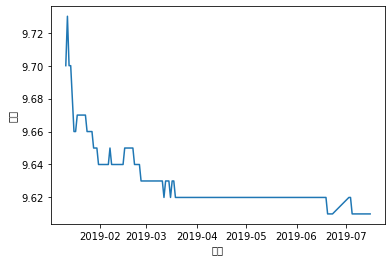

In [15]:
"""하나의 영화 그려보기"""
df_top = movie_df2[movie_df2['영화명'] == name_ranking_lst[0]]
sns.lineplot(x='날짜',y='평점',data=df_top)

In [18]:
"""seaborn으로 그리기 위해 특정 영화만 데이터프레임으로 합치기"""
df_concat = pd.DataFrame()
for name in name_ranking_lst[:3]:
  df_temp = movie_df2[movie_df2['영화명'] == name]
  df_concat = pd.concat([df_concat,df_temp])
df_concat

,날짜,영화명,평점
127067,2019-01-11,그린 북,9.70
127107,2019-01-12,그린 북,9.73
127147,2019-01-13,그린 북,9.70
127186,2019-01-14,그린 북,9.70
127228,2019-01-15,그린 북,9.68
...,...,...,...
120534,2018-08-13,아일라,9.54
120585,2018-08-14,아일라,9.53
120635,2018-08-15,아일라,9.52
120685,2018-08-16,아일라,9.52


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


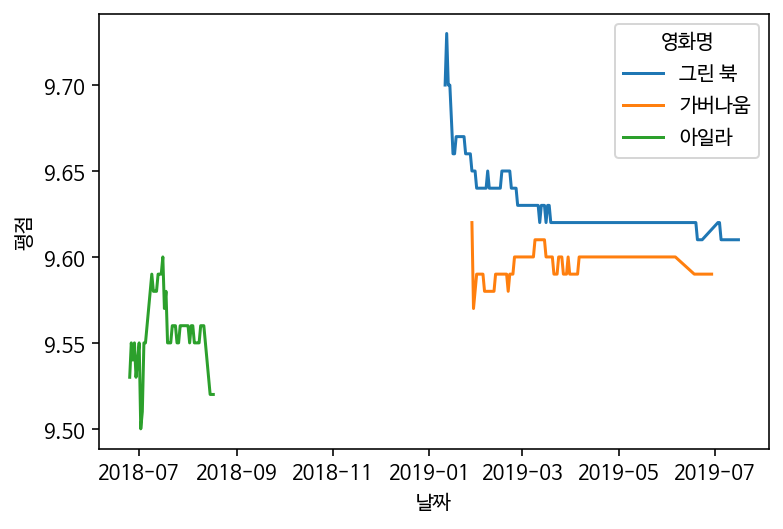

In [21]:
sns.lineplot('날짜','평점',data=df_concat,hue='영화명')

In [ ]:
"""영화 하나당 1개의 그래프 그리기"""
